# EXPLORATION EDITS

In [2]:
import pandas as pd
import os

# Una vez que hemos convertido la data a .pkl
directory = 'converted'

dataframes = {}

# Loop through each file in the directory
for file in os.listdir(directory):
    if file.startswith('df_'):
        language = file.split('_')[1][:2]

        print(f"Reading file: {file}")

        path = os.path.join(directory, file)
        df = pd.read_pickle(path)
        df.drop('datetime', axis=1, inplace=True)

        df_exploded = df.explode('categories')

        category_counts = df_exploded.groupby('categories').size().reset_index(name='counts')

        dataframes[language] = category_counts

if 'es' in dataframes:
    print(dataframes['es'])


Reading file: df_ar
Reading file: df_de
Reading file: df_hu
Reading file: df_zh
Reading file: df_pt
Reading file: df_es
Reading file: df_fr
Reading file: df_vi
Reading file: df_ru
Reading file: df_ja
Reading file: df_it
    categories    counts
0         arte   6130683
1      deporte   2257600
2      derecho   6158384
3      eventos   5804623
4    filosofia   6976327
5    geografia   3996127
6     historia  10590511
7       juegos    525643
8   matematica    550932
9   naturaleza   3905654
10    politica   4889978
11    religion   1779186
12       salud   1700446


In [5]:
directory='category_edits'
for language, df in dataframes.items():
    csv_path = os.path.join(directory, f'category_counts_{language}.csv')
    df.to_csv(csv_path, index=False)
    print(f"Archivo CSV creado para {language}: {csv_path}")

Archivo CSV creado para ar: category_edits/category_counts_ar.csv
Archivo CSV creado para de: category_edits/category_counts_de.csv
Archivo CSV creado para hu: category_edits/category_counts_hu.csv
Archivo CSV creado para zh: category_edits/category_counts_zh.csv
Archivo CSV creado para pt: category_edits/category_counts_pt.csv
Archivo CSV creado para es: category_edits/category_counts_es.csv
Archivo CSV creado para fr: category_edits/category_counts_fr.csv
Archivo CSV creado para vi: category_edits/category_counts_vi.csv
Archivo CSV creado para ru: category_edits/category_counts_ru.csv
Archivo CSV creado para ja: category_edits/category_counts_ja.csv
Archivo CSV creado para it: category_edits/category_counts_it.csv


In [6]:
import pandas as pd
import os

directory = 'category_edits'


translation_dict = {
    'arte': 'art', 'deporte': 'sports', 'derecho': 'rights', 'eventos': 'events',
    'filosofia': 'philosophy', 'geografia': 'geography', 'historia': 'history',
    'juegos': 'games', 'matematica': 'mathematics', 'naturaleza': 'nature',
    'politica': 'politics', 'salud': 'health', 'desportos': 'sports', 
    'direito': 'rights', 'jogos': 'games', 'natureza': 'nature', 
    'religiao': 'religion', 'saude': 'health'
}


dfs = []


for file in os.listdir(directory):
    if file.startswith('category_counts_') and file.endswith('.csv'):
        # Determine the language from the filename
        language = file.split('_')[2].split('.')[0]

        # Load the CSV file
        path = os.path.join(directory, file)
        df = pd.read_csv(path)

        # Translate categories using the dictionary
        df['categories'] = df['categories'].map(translation_dict).fillna(df['categories'])

        # Add a column for the language
        df['language'] = language

        # Append to the list of DataFrames
        dfs.append(df)


combined_df = pd.concat(dfs, ignore_index=True)


pivot_table = combined_df.pivot_table(index='language', columns='categories', values='counts', fill_value=0)


print(pivot_table)


categories       art   events   foods   games  geography   health   history  \
language                                                                      
ar            903925   543873   37586  143757     864884   495375    969461   
de          10415921  1360659       0  265599    4209418   327145   7526262   
es           6130683  5804623       0  525643    3996127  1700446  10590511   
fr           6240798  6103791       0  505773    7712377  4064701  11844271   
hu            950572   267652       0   38149    1169371   114506   1642787   
it           3299500  3335852       0  685083    2765888  1516779   2332502   
ja           3578264   344568  172023  648159    3316937  1385840   5574262   
pt           4343667  4757340       0  348168    4157907  1120283   6254149   
ru           1892793   953538   93896  351049    1631271   312386   2492216   
vi            263335   342997    9396   91053     514706   202285    474486   
zh           2279824   572207   75876  159273    139

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

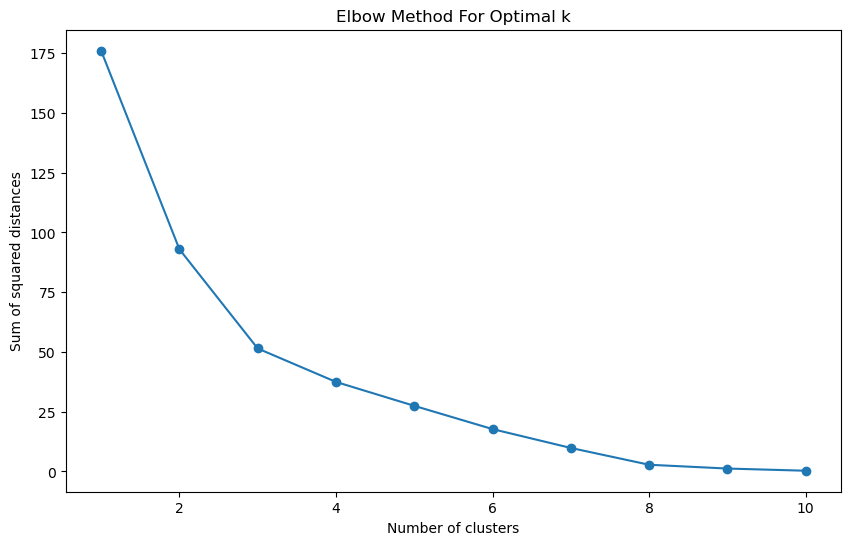

/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


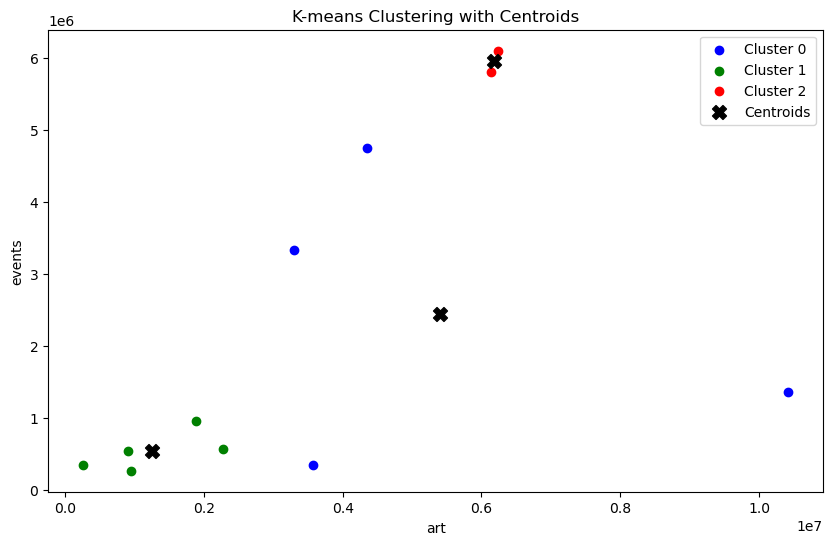

[[-9.62040619e-01 -7.52810405e-01  4.16278526e-02 -9.24250307e-01
  -1.00382148e+00 -5.11989100e-01 -9.68790522e-01 -5.22504667e-01
  -1.03482562e+00 -5.07789977e-01 -8.22155934e-01 -7.08877874e-01
  -6.48472197e-01 -1.06953739e+00 -1.01015254e+00  2.54000254e-01]
 [ 2.35393767e+00 -3.85305931e-01 -6.56044090e-01 -3.56120837e-01
   6.58162579e-01 -6.65273625e-01  7.56251895e-01  3.21470083e-02
  -5.99925499e-02 -5.69026319e-01  1.17253400e+00  1.83311132e+00
   2.25492119e-01  1.48291398e+00  1.21218305e+00 -1.14300114e+00]
 [ 8.60060236e-01  1.61421004e+00 -6.56044090e-01  8.56422127e-01
   5.52172853e-01  5.86023952e-01  1.56243154e+00  1.43603288e+00
   1.01666526e+00  2.74155214e+00  8.42876957e-01  9.69843996e-01
   2.75973777e+00  1.12514634e+00  1.01015254e-01  1.65100165e+00]
 [ 8.98447442e-01  1.74881761e+00 -6.56044090e-01  7.63771542e-01
   2.39887206e+00  2.74023964e+00  1.89228587e+00  2.18787642e+00
   3.07430477e-01  3.94744212e-01  2.22676626e+00  1.26105690e+00
   1.00

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
data_scaled = scaler.fit_transform(pivot_table)


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)


pivot_table['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']  # Colors for the clusters

for i, color in zip(range(k), colors):
    cluster_data = pivot_table[pivot_table['Cluster'] == i]
    plt.scatter(cluster_data[categories[0]], cluster_data[categories[1]], label=f'Cluster {i}', c=color)

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids', marker='X')

plt.title('K-means Clustering with Centroids')
plt.xlabel(categories[0])
plt.ylabel(categories[1])
plt.legend()
plt.show()

# Display the pivot table with clusters
print(data_scaled)


In [40]:
data_cleaned

categories,art,events,foods,games,geography,health,history,mathematics,nature,philosophy,politics,religion,rights,sports,Cluster,Predicted_Cluster
language,,,,,,,,,,,,,,,,
ar,903925,543873,37586,143757,864884,495375,969461,192630,1021854,594310,950710,532208,225583,236376,0,0
de,10415921,1360659,0,265599,4209418,327145,7526262,294100,2392186,474036,5669907,2420433,1746926,2587091,1,2
es,6130683,5804623,0,525643,3996127,1700446,10590511,550932,3905654,6976327,4889978,1779186,6158384,2257600,2,1
fr,6240798,6103791,0,505773,7712377,4064701,11844271,688477,2908676,2366973,8164094,1995503,3102932,2627204,2,1
hu,950572,267652,0,38149,1169371,114506,1642787,65579,778220,146737,637001,229554,249616,376595,0,0
it,3299500,3335852,0,685083,2765888,1516779,2332502,178707,1369295,873080,1661900,1362634,1321674,1497913,0,0
ja,3578264,344568,172023,648159,3316937,1385840,5574262,288014,3583637,1128588,2445083,640017,547433,1103669,1,2
pt,4343667,4757340,0,348168,4157907,1120283,6254149,232137,5297173,3568693,4095606,1434052,544189,1699968,1,2
ru,1892793,953538,93896,351049,1631271,312386,2492216,172067,3012209,435277,1156190,748237,531110,511254,0,0


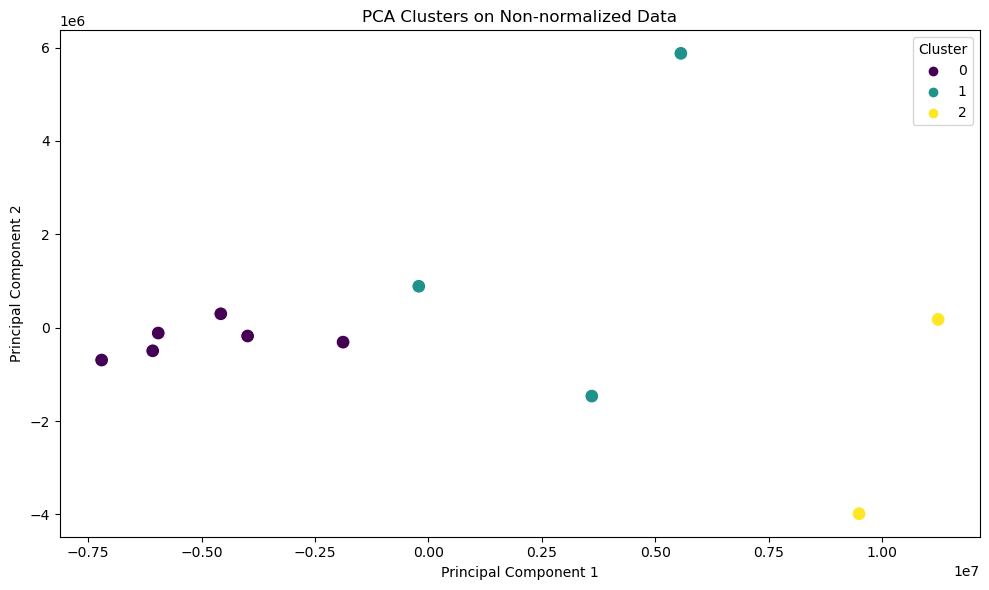

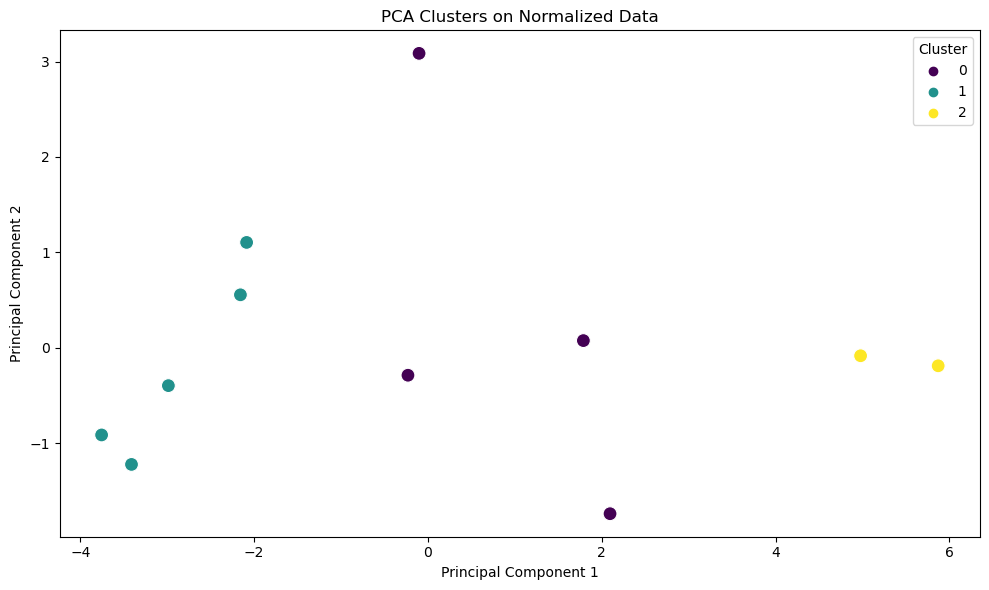

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)

# Reducción de los datos no normalizados
pca_data = pca.fit_transform(data.drop(columns=['Cluster']))  # Asegurarse de que 'Cluster' no está en los datos
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'], index=data.index)
pca_df['Cluster'] = data['Cluster']  # Asegurarse de que la columna 'Cluster' se añade correctamente

# Reducción de los datos normalizados (asegurarse de que 'Cluster_Scaled' no esté en los datos para PCA)
pca_data_scaled = pca.fit_transform(data_scaled_df.drop(columns='Cluster_Scaled'))
pca_scaled_df = pd.DataFrame(data=pca_data_scaled, columns=['PC1', 'PC2'], index=data_scaled_df.index)
pca_scaled_df['Cluster_Scaled'] = data_scaled_df['Cluster_Scaled']

# Función para visualizar los clusters
def plot_pca_clusters(df, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=hue, data=df, palette='viridis', legend='full', s=100)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Visualizar los clusters con PCA para datos no normalizados
plot_pca_clusters(pca_df, 'Cluster', 'PCA Clusters on Non-normalized Data')

# Visualizar los clusters con PCA para datos normalizados
plot_pca_clusters(pca_scaled_df, 'Cluster_Scaled', 'PCA Clusters on Normalized Data')


## Hierarchical

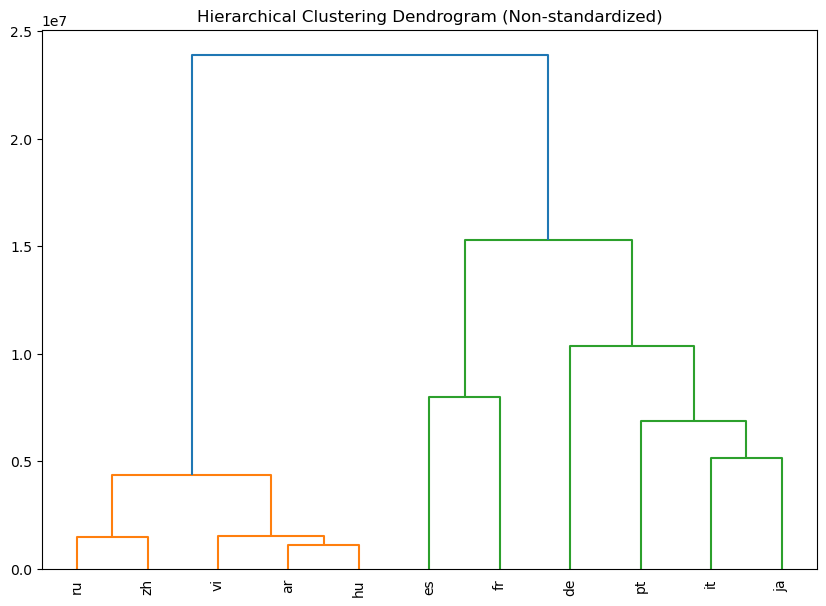

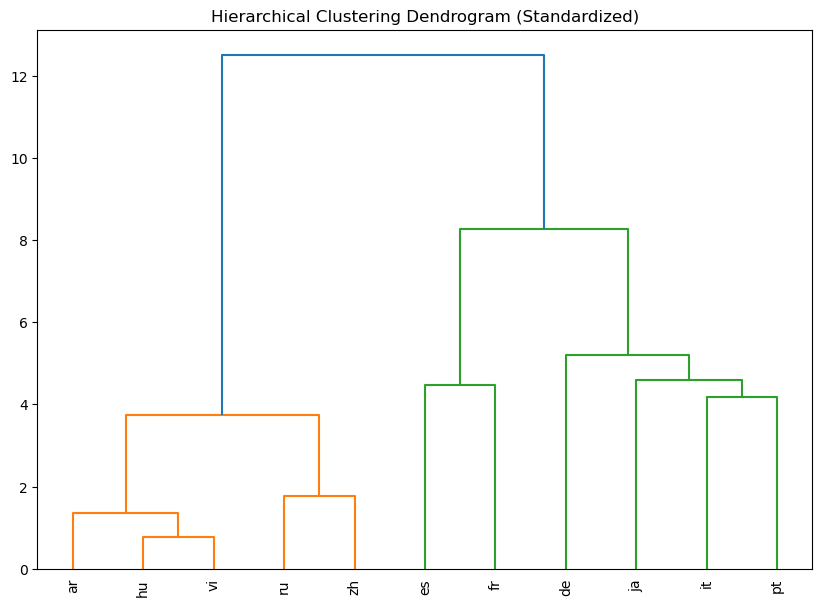

In [32]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the non-standardized data
linked = linkage(data, method='ward')

# Perform hierarchical clustering on the standardized data
linked_scaled = linkage(data_scaled_df, method='ward')

# Function to plot dendrogram
def plot_dendrogram(linked, title):
    plt.figure(figsize=(10, 7))
    dendrogram(linked, labels=data.index.to_list(), leaf_rotation=90, leaf_font_size=10)
    plt.title(title)
    plt.show()

# Plot dendrograms
plot_dendrogram(linked, 'Hierarchical Clustering Dendrogram (Non-standardized)')
plot_dendrogram(linked_scaled, 'Hierarchical Clustering Dendrogram (Standardized)')


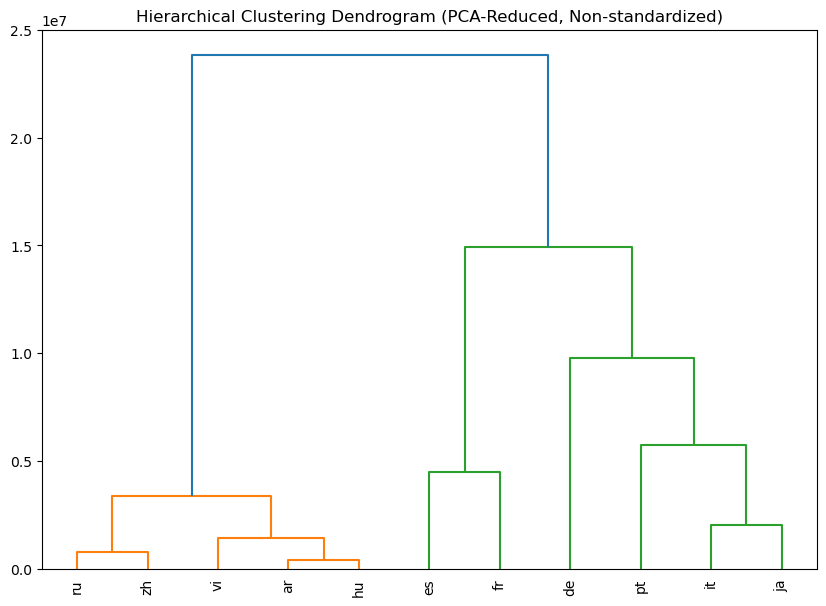

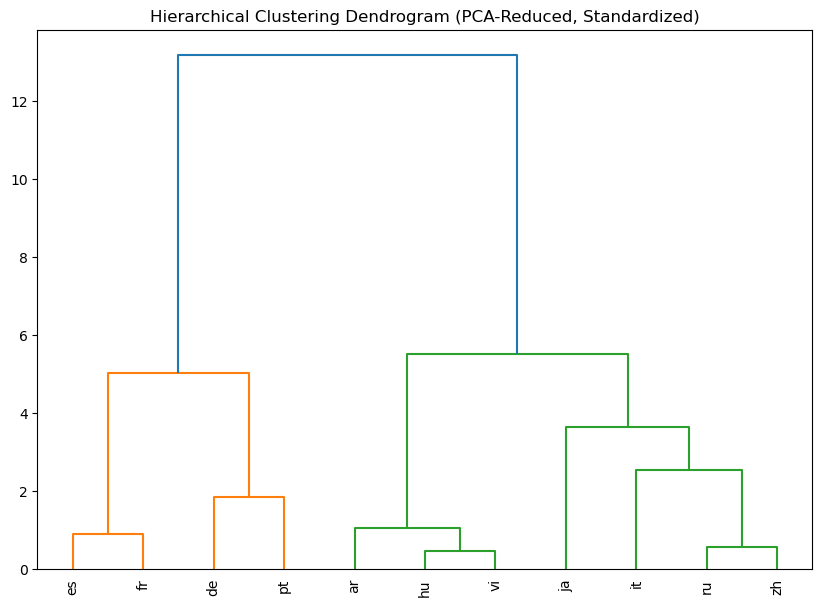

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  
data_pca = pca.fit_transform(data)
data_scaled_pca = pca.fit_transform(data_scaled)


data_pca_df = pd.DataFrame(data_pca, index=data.index, columns=['PC1', 'PC2'])
data_scaled_pca_df = pd.DataFrame(data_scaled_pca, index=data.index, columns=['PC1', 'PC2'])


from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linked_pca = linkage(data_pca_df, method='ward')
linked_scaled_pca = linkage(data_scaled_pca_df, method='ward')

def plot_dendrogram(linked, title):
    plt.figure(figsize=(10, 7))
    dendrogram(linked, labels=data_pca_df.index.to_list(), leaf_rotation=90, leaf_font_size=10)
    plt.title(title)
    plt.show()


plot_dendrogram(linked_pca, 'Hierarchical Clustering Dendrogram (PCA-Reduced, Non-standardized)')
plot_dendrogram(linked_scaled_pca, 'Hierarchical Clustering Dendrogram (PCA-Reduced, Standardized)')


In [38]:
# Number of clusters
k = 3  


kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)


labels = kmeans.labels_

# Attach labels to original data for review
data_cleaned['Predicted_Cluster'] = labels
print(data_cleaned[['Predicted_Cluster']])


categories  Predicted_Cluster
language                     
ar                          0
de                          2
es                          1
fr                          1
hu                          0
it                          0
ja                          2
pt                          2
ru                          0
vi                          0
zh                          0


/Users/andrevill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score:', score)


Silhouette Score: 0.41091157153972235
